In [3]:
import gensim.downloader as api
from nltk.corpus import stopwords
import string
import re
from argostranslate import package, translate
import numpy as np

In [4]:
import sys
sys.path

['/mnt/c/Users/Mitbu/PycharmProjects/eng_app_module',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/ilya/.local/lib/python3.8/site-packages',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/ilya/.local/lib/python3.8/site-packages/IPython/extensions',
 '/home/ilya/.ipython']

# LIST OF WORDS

In [5]:
model = api.load('word2vec-google-news-300')

In [6]:
stop = stopwords.words('english')

In [7]:
stop = set(map(lambda x: x.lower(), stop))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
punct = re.compile(f'[^a-z\'_-]')

In [9]:
def is_word_correct(word):
    return word not in stop and punct.search(word) is None

In [10]:
def getSameWord(vec, max=10, similarity=0.5):
    res = model.similar_by_vector(vec, topn=max)
    for w in res:
        word = w[0].lower()
        if w[1] < similarity:
            continue
        if is_word_correct(word):
            yield word.replace('_', ' ')

In [11]:
# list(getSameWord('gnostic', max=100))

In [12]:
def is_known(word):
    return False
def is_interesting(word):
    return True

In [13]:
def predict_by_word(word, max=100):
    if word in model.wv:
        vec = model.wv[word]
        return predict_by_vec(vec, max=max)

In [14]:
def predict_by_vec(vec, max=100):
    return [w for w in getSameWord(vec, max=max) if not is_known(w) and is_interesting(w)]

In [15]:
test=model.wv['graph']

<ipython-input-15-7020811dd9fa>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  test=model.wv['graph']


In [16]:
'google' in model.wv

<ipython-input-16-16859e009823>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  'google' in model.wv


True

In [17]:
# predict_by_word('technology')

In [18]:
test='google'

# TRANSLATE

In [31]:
package.install_from_path('lib/data/translate-en_ru-1_1.argosmodel')

In [32]:
[str(s) for s in translate.get_installed_languages()]

['English', 'Russian']

In [33]:
installed_languages = translate.get_installed_languages()

In [34]:
translation_en_ru = installed_languages[0].get_translation(installed_languages[1])

In [35]:
translation_en_ru.translate("hello word")

'привет слово'

# VOCAB

In [36]:
vocab = [k for k in model.wv.vocab if is_word_correct(k)]

<ipython-input-36-d75e84cb4dc8>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vocab = [k for k in model.wv.vocab if is_word_correct(k)]


In [37]:
vocab

['said',
 'year',
 'one',
 'would',
 'also',
 'two',
 'first',
 'time',
 'last',
 'new',
 'people',
 'could',
 'years',
 'three',
 'million',
 'like',
 'percent',
 'get',
 'game',
 'back',
 'company',
 'team',
 'made',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'week',
 'government',
 'home',
 'going',
 'good',
 "'re",
 'many',
 'way',
 'four',
 'may',
 'since',
 'work',
 'take',
 'including',
 'high',
 'next',
 'much',
 'still',
 'go',
 'think',
 'old',
 'even',
 'world',
 'see',
 'say',
 'business',
 'five',
 'told',
 'us',
 'right',
 'play',
 'help',
 'market',
 'know',
 'end',
 'long',
 'information',
 'points',
 'part',
 'around',
 'police',
 'want',
 "'ve",
 'based',
 'got',
 'third',
 'school',
 'left',
 'another',
 'country',
 'need',
 'best',
 'win',
 'quarter',
 'use',
 'today',
 'public',
 'run',
 'set',
 'month',
 'top',
 'billion',
 'come',
 'city',
 'place',
 'night',
 'six',
 'group',
 'really',
 'found',
 'used',
 'lot',
 "'m",
 'money',
 'put',

In [38]:
len(vocab)

425881

In [39]:
user_knowledge = np.full((len(vocab),), False, dtype=bool)

In [40]:
vocab_dict = {
    w: i
    for i, w in enumerate(vocab)
}

In [41]:
vocab_dict

{'said': 0,
 'year': 1,
 'one': 2,
 'would': 3,
 'also': 4,
 'two': 5,
 'first': 6,
 'time': 7,
 'last': 8,
 'new': 9,
 'people': 10,
 'could': 11,
 'years': 12,
 'three': 13,
 'million': 14,
 'like': 15,
 'percent': 16,
 'get': 17,
 'game': 18,
 'back': 19,
 'company': 20,
 'team': 21,
 'made': 22,
 'make': 23,
 'second': 24,
 'state': 25,
 'well': 26,
 'day': 27,
 'season': 28,
 'says': 29,
 'week': 30,
 'government': 31,
 'home': 32,
 'going': 33,
 'good': 34,
 "'re": 35,
 'many': 36,
 'way': 37,
 'four': 38,
 'may': 39,
 'since': 40,
 'work': 41,
 'take': 42,
 'including': 43,
 'high': 44,
 'next': 45,
 'much': 46,
 'still': 47,
 'go': 48,
 'think': 49,
 'old': 50,
 'even': 51,
 'world': 52,
 'see': 53,
 'say': 54,
 'business': 55,
 'five': 56,
 'told': 57,
 'us': 58,
 'right': 59,
 'play': 60,
 'help': 61,
 'market': 62,
 'know': 63,
 'end': 64,
 'long': 65,
 'information': 66,
 'points': 67,
 'part': 68,
 'around': 69,
 'police': 70,
 'want': 71,
 "'ve": 72,
 'based': 73,
 'got':

In [42]:
def learn_word(user_knowledge, word):
    if word not in vocab_dict:
        raise 'Undefined word'
    user_knowledge[vocab_dict[word]] = True
    return user_knowledge

def get_known_words(user_knowledge):
    idx = user_knowledge.nonzero()
    return [vocab[i] for i in idx[0]]

In [43]:
user_knowledge = learn_word(user_knowledge, 'paste')

In [44]:
get_known_words(user_knowledge)

['paste']

In [45]:
# теперь необходимо обучить 2 модели:
# 1) предсказывает по реально изученным словам, значет ли юзер новое слово
# (или сразу предсказывает вектор предположительно изученных слов)
# 2) по статистеке о юзере предсказывает, будт ли ему интересно данное слово

# User words preprocessing

In [46]:
# https://study-english.info/vocabularies.php

In [47]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ilya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
with open(r'words/raw/Лексика по теме Выборы.txt') as f:
    print(f.read())

English term
Транскрипция
Русское название
absentee voter	[ ˌæbsənˈtiː ˈvəʊtə ]	избиратель, голосующий заочно
absentee voting	[ ˌæbsənˈtiː ˈvəʊtɪŋ ]	заочное голосование
absentee voting certificate	[ ˌæbsənˈtiː ˈvəʊtɪŋ səˈtɪfɪkeɪt ]	открепительное удостоверение для голосования
absolute majority	[ ˈæbsəluːt məˈdʒɒrɪti ]	абсолютное большинство
access to media	[ ˈækses tə ˈmiːdɪə ]	доступ к СМИ
accountability	[ əˌkaʊntəˈbɪləti ]	подотчетность
accreditation	[ əˌkredɪˈteɪʃən ]	аккредитация
accredited agent (of a candidate)	[ əˈkredɪtɪd ˈeɪdʒənt əv ə ˈkændɪdət ]	аккредитованное доверенное лицо (кандидата)
adjudication of grievances	[ əˌdʒuːdɪˈkeɪtʃən əv ˈɡriːvnsɪz ]	рассмотрение жалоб
administrative and territorial division of a subject of the Russian Federation	[ ədˈmɪnɪstrətɪv ənd ˌterɪˈtɔːrɪəl dɪˈvɪʒən əv ə sʌbˈdʒekt əv ðə ˈrʌʃən ˌfedəˈreɪʃən ]	административно-территориальное устройство субъекта Российской Федерации
administrative liability for infringing upon electoral rights of citizens 

In [49]:
res = []
with open(r'words/raw/Лексика по теме Выборы.txt') as f:
    for line in f.read().split('\n'):
        line = line.split('\t')
        if len(line) == 3:
            for w in word_tokenize(line[0]):
                if is_word_correct(w):
                    res.append(w)

In [50]:
res_set = set(res)
len(res), len(res_set)

(901, 377)

In [51]:
word_tokenize('autonomous district / okrug (Russia)pate in a referendum')

['autonomous',
 'district',
 '/',
 'okrug',
 '(',
 'Russia',
 ')',
 'pate',
 'in',
 'a',
 'referendum']

In [52]:
def filter_file(path, en_col, total_col):
    with open(path) as f:
        for line in f.read().split('\n'):
            line = line.split('\t')
            if len(line) == total_col:
                for w in word_tokenize(line[en_col-1]):
                    if is_word_correct(w.lower()):
                        yield w.lower()

In [53]:
def create_dict(path, data):
    with open(path, 'w') as f:
        first_line = True
        for w in data:
            if first_line:
                first_line = False
                f.write(w.lower())
            else:
                f.write('\n' + w.lower())

In [54]:
files = [
('Американский сленг.txt', 1, 2),
('Английские идиомы с переводом и примерами.txt', 1, 3),
('Английские пословицы и поговорки.txt', 1, 2),
('Английские разговорные словосочетания и выражения.txt', 1, 2),
('Английский сленг.txt', 1, 2),
('Глаголы для описания приготовления пищи.txt', 1, 2),
('Лексика по теме Автомобиль.txt', 1, 3),
('Лексика по теме Анатомия.txt', 1, 3),
('Лексика по теме Археология.txt', 2, 3),
('Лексика по теме Архитектура.txt', 2, 3),
('Лексика по теме Аэропорт.txt', 1, 3),
('Лексика по теме Внешность.txt', 1, 3),
('Лексика по теме Выборы.txt', 1, 3),
('Лексика по теме Город.txt', 2, 3),
('Лексика по теме Гостиница.txt', 1, 2),
('Лексика по теме Грамматика.txt', 2, 2),
('Лексика по теме Деревья.txt', 2, 2),
('Лексика по теме Дом.txt', 1, 3),
('Лексика по теме Еда.txt', 2, 2),
('Лексика по теме Животные.txt', 1, 3),
('Лексика по теме Здоровье, части тела.txt', 2, 3),
('Лексика по теме Имущество.txt', 1, 2),
('Лексика по теме Искусство.txt', 1, 2),
('Лексика по теме Карты (игральные).txt', 1, 3),
('Лексика по теме Карьера.txt', 1, 2),
('Лексика по теме Кино.txt', 1, 2),
('Лексика по теме Компьютер.txt', 1, 2),
('Лексика по теме Кустарники.txt', 2, 2),
('Лексика по теме Магазины.txt', 2, 2),
('Лексика по теме Мебель.txt', 2, 2),
('Лексика по теме Медицина.txt', 1, 2),
('Лексика по теме Мобильный телефон.txt', 1, 2), ##
('Лексика по теме Музыка.txt', 1, 3),
('Лексика по теме Насекомые.txt', 2, 2),
('Лексика по теме Одежда.txt', 1, 3),
('Лексика по теме Олимпийские виды спорта.txt', 1, 3),
('Лексика по теме Профессии.txt', 1, 2),
('Лексика по теме Птицы.txt', 2, 3),
('Лексика по теме Путешествие.txt', 2, 2),
('Лексика по теме Рыбы.txt', 1, 2),
('Лексика по теме Семья и родственники.txt', 2, 3),
('Лексика по теме Спорт.txt', 1, 2),
('Лексика по теме Строительство.txt', 2, 2),
('Лексика по теме Футбол.txt', 2, 2),
('Лексика по теме Характер.txt', 2, 3),
('Лексика по теме Химия.txt', 2, 3),
('Лексика по теме Хобби.txt', 1, 2),
('Лексика по теме Хоккей.txt', 2, 2),
('Лексика по теме Художественные промыслы.txt', 2, 2),
('Лексика по теме Цвета.txt', 1, 3),
('Лексика по теме Шахматы.txt', 1, 3),
('Лексика по теме Экология.txt', 1, 2),
('Лексика по теме Экономика.txt', 2, 3)
]

In [55]:
for f in files:
    data = set(filter_file(f'words/raw/{f[0]}', f[1], f[2]))
    create_dict(f'words/dict/{f[0]}', data)

# Create user class

In [56]:
import random
import math

In [57]:
class User:
    # интерес - список интересов те числ от 0 до 1, часть слов, которые знает юзер
    def __init__(self, intresting, intr_param=0.5):
        self.words_known = set()
        self.words_intresting = set()
        for i, intr in enumerate(intresting):
            with open(f'words/dict/{files[i][0]}') as f:
                data = f.read().split('\n')
                # все данные из файла с интересной темой кладем в words_intresting
                if intr >= intr_param:
                    for word in data:
                        self.words_intresting.add(word)
                # для каждой темы кладем пропорционально интересу слов в words_known
                for word in random.choices(data, k=math.floor(intr * len(data))):
                    self.words_known.add(word)
    def is_intersting(self, word):
        return word in self.words_intresting
    def is_known(self, word):
        return word in self.words_known

In [58]:
u = User([0.5] * len(files))

In [59]:
u.is_intersting('fist')

True

# Получаем список всех слов

In [60]:
u = User([1] * len(files))

In [61]:
not_in_wv = 0
for w in u.words_known:
    if w not in model.wv:
        not_in_wv += 1
        print(w)

ex-wife
boneytongue
second-and-a-half
empty-net
big-box
flommox
reefshark
symbolists
self-portrait
gatto
aposteme
cornelian
full-length
turtle-dove
latterino
botia
night-lamp
knee-lengh
dot-blot
colour-box
multi-party
non-parametric
amarela
great-grandmother
great-grandchildren
flash-back
tailor-made
shut-out
mother-in-law
peled
self-critical
smoothhound
avant-garde
epiet
forepart
watercolour
waffle-maker
footstall
disinsection
labeo
dfa-tp
aluminium
estonia
influenza-like
strewth
theatre
jolthead
unidimentional
horsemackerel
poker-faced
cec
low-heel
vendace
folder-file
self-government
syphon
gear-change
knee-high
mekong
single-mandate
latvia
hpa
ten-cent
semi-finished
leukosis
art-worker
ombrina
pre-vaccine
sacher
dish-drainer
drug-resistant
carry-on
centre
semi-detached
pyodermatosis
gacvs
vaccine-associated
light-hearted
culture-positive
bcg-vaccine
inconnu
flexneri
colibacillosis
epidemica
opisthorchiasis
long-term
hcv
dirofilariasis
cross-country
minzdravsotsrazvitija
promed-mail


<ipython-input-61-0950fed65ff3>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w not in model.wv:


In [62]:
not_in_wv / len(u.words_known)

0.11144631765749778

In [63]:
# create train data

In [64]:
u1 = User([random.uniform(0,1) for i in files], intr_param=0.5)

In [65]:
known = [] # мы знаем о том, что юзер знает эти слова
total = u.words_known # ограничиваем список всех слов (для теста)
already_known = [] # слова, которые мы порекомендовали, но юзер их уже знал
interests = [] # слова, которые мы порекомендовали и юзеру они оказались интересны (включая уже известные)
total_pred = [] # все предсказанные слова

In [66]:
k=200
for w in random.choices(list(u1.words_known), k=k):
    known.append(w)

In [67]:
for i, w in enumerate(known):
    print(str((i+1)/k) + '\t', end='\r')
    pred = predict_by_word(w, max=1000)
    if pred is None:
        pred = []
    for pw in pred:
        if pw in total:
            total_pred.append(pw)
            if u1.is_intersting(pw):
                interests.append(pw)
            if u1.is_known(pw):
                already_known.append(pw)

<ipython-input-13-bac5167a71f0>:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if word in model.wv:
<ipython-input-13-bac5167a71f0>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vec = model.wv[word]


In [68]:
len(total_pred)

991

In [69]:
len(interests)

907

In [70]:
len(already_known)

621

In [71]:
len(u1.words_known)

4189

In [72]:
# те мы можем достаточно хорошо предсказывать слова, которые интеречсны пользователю,
# однако большинство из этих слов он уже знает (хотя нам об этом неизвестно)
# возможное решение - рекомендовать слова по уровню пользователя (модель предсказывает, знает ли юзер это слово)
# данные результат зависит от значение User.intr_param

In [73]:
len(interests) / len(total_pred)

0.9152371342078708

In [74]:
len(already_known) / len(total_pred)

0.6266397578203835

In [75]:
len(already_known) / len(interests)

0.6846747519294377

# Обучаем модель1 (знает ли юзер новое слово)

In [76]:
# на каждого юзера свои модель => она должна быть компактной, быстрой, работать намеленьких данных
# необходимо юзать батчи и пр. методы расширения информации на малой выборке (понижать размерность эмбединга слова)

In [77]:
u2 = User([random.uniform(0,1) for i in files], intr_param=0.5)

In [78]:
# слова, полученные в результате тестирования
test = []

In [79]:
k=500
for w in random.choices(list(total), k=k):
    test.append((w, u2.is_known(w)))

In [80]:
train = {'vec': [], 'ans': []}

In [81]:
for (w, kn) in test:
    if w in model.wv:
        train['vec'].append(model.wv[w])
        train['ans'].append(int(kn))

<ipython-input-81-f2f52030c32d>:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w in model.wv:
<ipython-input-81-f2f52030c32d>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  train['vec'].append(model.wv[w])


In [82]:
x_t = pd.DataFrame(train['vec'])

In [83]:
y_t = pd.DataFrame(train['ans'])

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors=5) # последовательно пробуем все модели выше

In [86]:
knn.fit(x_t, y_t)

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [87]:
knn.predict

<bound method KNeighborsClassifier.predict of KNeighborsClassifier()>

In [88]:
data = []
for w in list(total):
    data.append((w, u2.is_known(w)))

In [89]:
test_data = {'vec': [], 'ans': []}

In [90]:
for (w, kn) in data:
    if w in model.wv and (w, kn) not in test:
        test_data['vec'].append(model.wv[w])
        test_data['ans'].append(int(kn))

<ipython-input-90-2ee88408c533>:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w in model.wv and (w, kn) not in test:
<ipython-input-90-2ee88408c533>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  test_data['vec'].append(model.wv[w])


In [91]:
x = pd.DataFrame(test_data['vec'])
y = pd.DataFrame(test_data['ans'])

In [92]:
y['pred'] = knn.predict(x)

In [93]:
y[y['pred']==1]

0  pred
2     1     1
3     1     1
5     1     1
6     0     1
8     1     1
...  ..   ...
4568  1     1
4569  1     1
4570  1     1
4573  0     1
4574  1     1

[2524 rows x 2 columns]

In [94]:
from sklearn.metrics import f1_score

In [95]:
f1_score(y[0], y['pred'])

0.5343511450381679

In [96]:
len(test_data['ans']), len(test), len(total)

(4575, 500, 5635)

In [97]:
f1_score([random.randint(0,1) for i in range(10**5)], [random.randint(0,1) for i in range(10**5)])

0.5011763056993264

# попробуем снизить размерность

In [98]:
from sklearn.decomposition import PCA as sklearnPCA

In [99]:
comp=5
sklearn_pca = sklearnPCA(n_components=comp)
pca_tfidf_sklearn = sklearn_pca.fit(x_t)

In [100]:
pca_tfidf_sklearn.transform(x)

array([[-8.52414533e-02, -6.59451477e-01,  1.23897305e-01,
        -1.21141827e-02, -1.04836877e-01],
       [ 1.67494388e+00, -2.00186403e-01, -3.62631618e-01,
         1.91711166e-01,  7.27429964e-02],
       [-7.12352863e-02, -1.86326049e-01,  7.56857958e-02,
        -5.71006438e-01, -2.75055596e-01],
       ...,
       [ 1.73631496e+00, -2.67404345e-01, -6.82283753e-01,
         2.29209820e-01,  1.02478885e+00],
       [ 2.84898775e-01,  5.13838917e-01,  9.97300855e-02,
        -8.31338444e-02, -7.29694462e-01],
       [ 4.07938825e-01,  6.78397911e-01, -1.12040510e-03,
         4.68845108e-01, -6.56309723e-01]])

In [101]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(pca_tfidf_sklearn.transform(x_t), y_t)
y['pred_transformed'] = knn.predict(pca_tfidf_sklearn.transform(x))

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [102]:
f1_score(y[0], y['pred_transformed'])

0.3668326985057135

In [103]:
tmp=list(pca_tfidf_sklearn.transform(x))

In [104]:
import matplotlib.pyplot as plt

In [105]:
x1 = pca_tfidf_sklearn.transform(x)
# ps. можно нарисовать график результата кластреизации. Обучение на базовых словах, на графике все (понижаем размерность до 2)

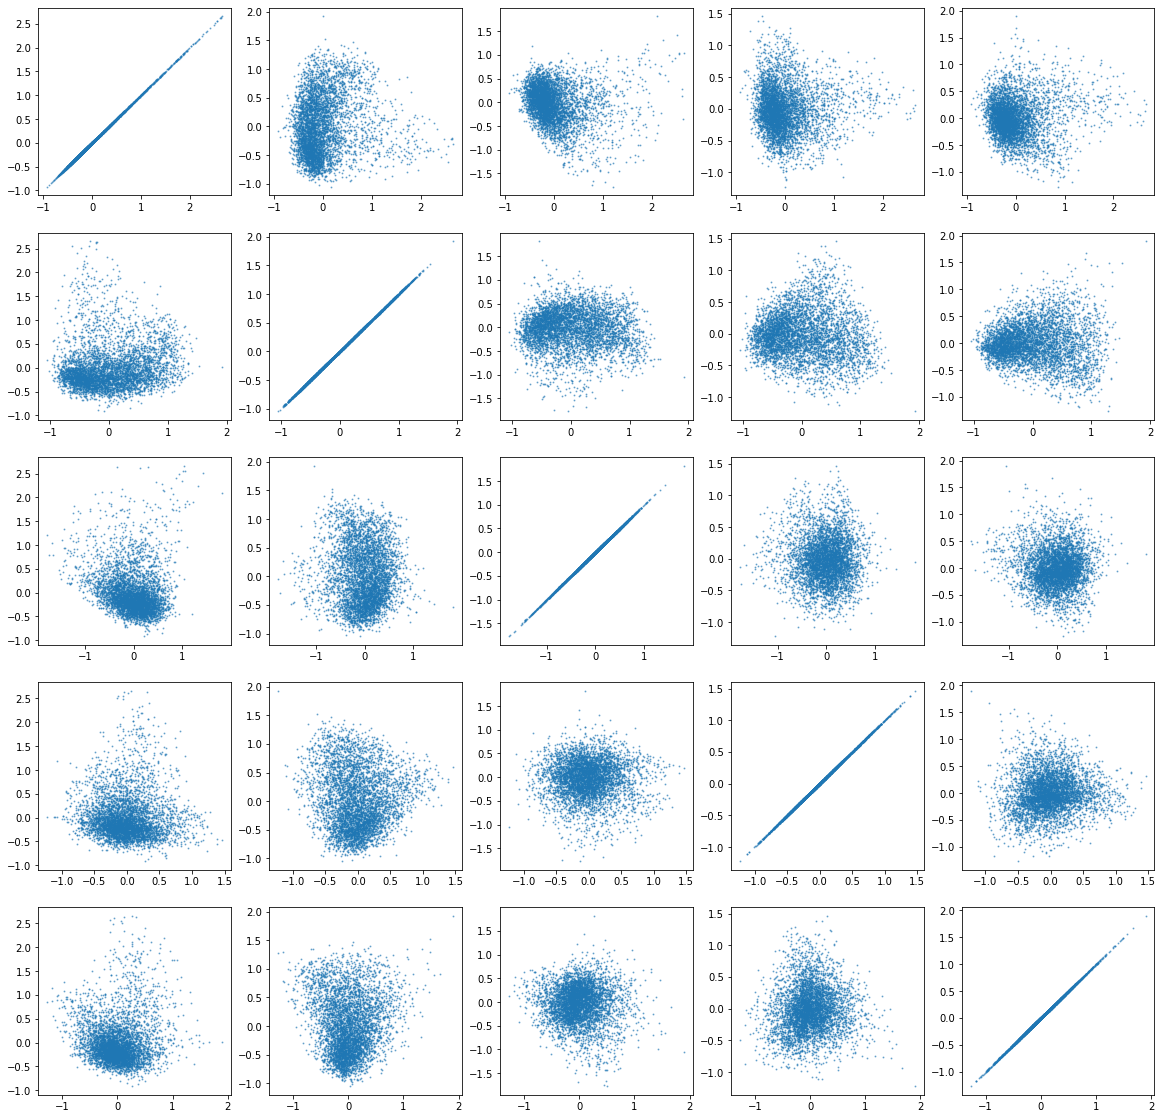

In [106]:
fig, axs = plt.subplots(comp, comp)
fig.set_figheight(20)
fig.set_figwidth(20)
for i in range(comp):
    for j in range(comp):
        axs[i, j].scatter(x1[:, i], x1[:, j], alpha=0.5, s=1)

# Предположим, что знание юзером слова зависит от его скила в предметной области. Чем дальше слово в списке, тем оно проще

In [107]:
import numpy as np

In [108]:
class UserUpd:
    # интерес - список интересов те числ от 0 до 1, часть слов, которые знает юзер
    def __init__(self, intresting, intr_param=0.5):
        self.words_known = set()
        self.words_intresting = set()
        for i, intr in enumerate(intresting):
            with open(f'words/dict/{files[i][0]}') as f:
                data = f.read().split('\n')
                # все данные из файла с интересной темой кладем в words_intresting
                if intr >= intr_param:
                    for word in data:
                        self.words_intresting.add(word)
                # для каждой темы кладем пропорционально интересу слов в words_known,
                # распределение задается удаленностьбю от начала
                # те чем ближе к началу списка слово, тем оно проще
                p = np.array([j / len(data) for j in range(len(data))])
                p = [p_i / p.sum() for p_i in p]
                for word in np.random.choice(data, size=10**5, p=p):
                    self.words_known.add(word)
    def is_intersting(self, word):
        return word in self.words_intresting
    def is_known(self, word):
        return word in self.words_known

In [109]:
# рисуем гистограмму распределения при новой генерации
with open(f'words/dict/{files[0][0]}') as f:
    data = f.read().split('\n')
    p = np.array([j / len(data) for j in range(len(data))])
    p_sum = p.sum()
    p = [p_i / p_sum for p_i in p]
    res = np.random.choice(len(data), size=10**5, p=p)

In [110]:
unique, counts = np.unique(res, return_counts=True)

<BarContainer object of 135 artists>

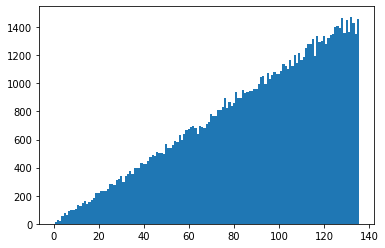

In [111]:
plt.bar(unique, counts, width=1) # можно показать различные приближения size

In [112]:
u2 = User([1] * 10 + [0] * (len(files) - 10), intr_param=0.8)
test = []
k=5000
for w in random.choices(list(total), k=k):
    test.append((w, u2.is_known(w)))

train = {'vec': [], 'ans': []}
for (w, kn) in test:
    if w in model.wv:
        train['vec'].append(model.wv[w])
        train['ans'].append(int(kn))
x_t = pd.DataFrame(train['vec'])
y_t = pd.DataFrame(train['ans'])

data = []
orig_words = []
for w in list(total):
    data.append((w, u2.is_known(w)))
test_data = {'vec': [], 'ans': []}
for (w, kn) in data:
    if w in model.wv and (w, kn) not in test:
        test_data['vec'].append(model.wv[w])
        orig_words.append(w)
        test_data['ans'].append(int(kn))
x = pd.DataFrame(test_data['vec'])
y = pd.DataFrame(test_data['ans'])

<ipython-input-112-72a6eebd14ab>:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w in model.wv:
<ipython-input-112-72a6eebd14ab>:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  train['vec'].append(model.wv[w])
<ipython-input-112-72a6eebd14ab>:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if w in model.wv and (w, kn) not in test:
<ipython-input-112-72a6eebd14ab>:22: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  test_data['vec'].append(model.wv[w])


In [113]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_t, y_t)
y['pred'] = knn.predict(x)

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [114]:
f1_score(y[0], y['pred'])

0.30395913154533843

In [115]:
comp=10  # покозать, что кластерная структура плохо прослеживается дляжи по =20
sklearn_pca = sklearnPCA(n_components=comp)
pca_tfidf_sklearn = sklearn_pca.fit(x_t)

In [116]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(pca_tfidf_sklearn.transform(x_t), y_t)
y['pred_transformed'] = knn.predict(pca_tfidf_sklearn.transform(x))

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [117]:
f1_score(y[0], y['pred_transformed'])

0.3337612323491656

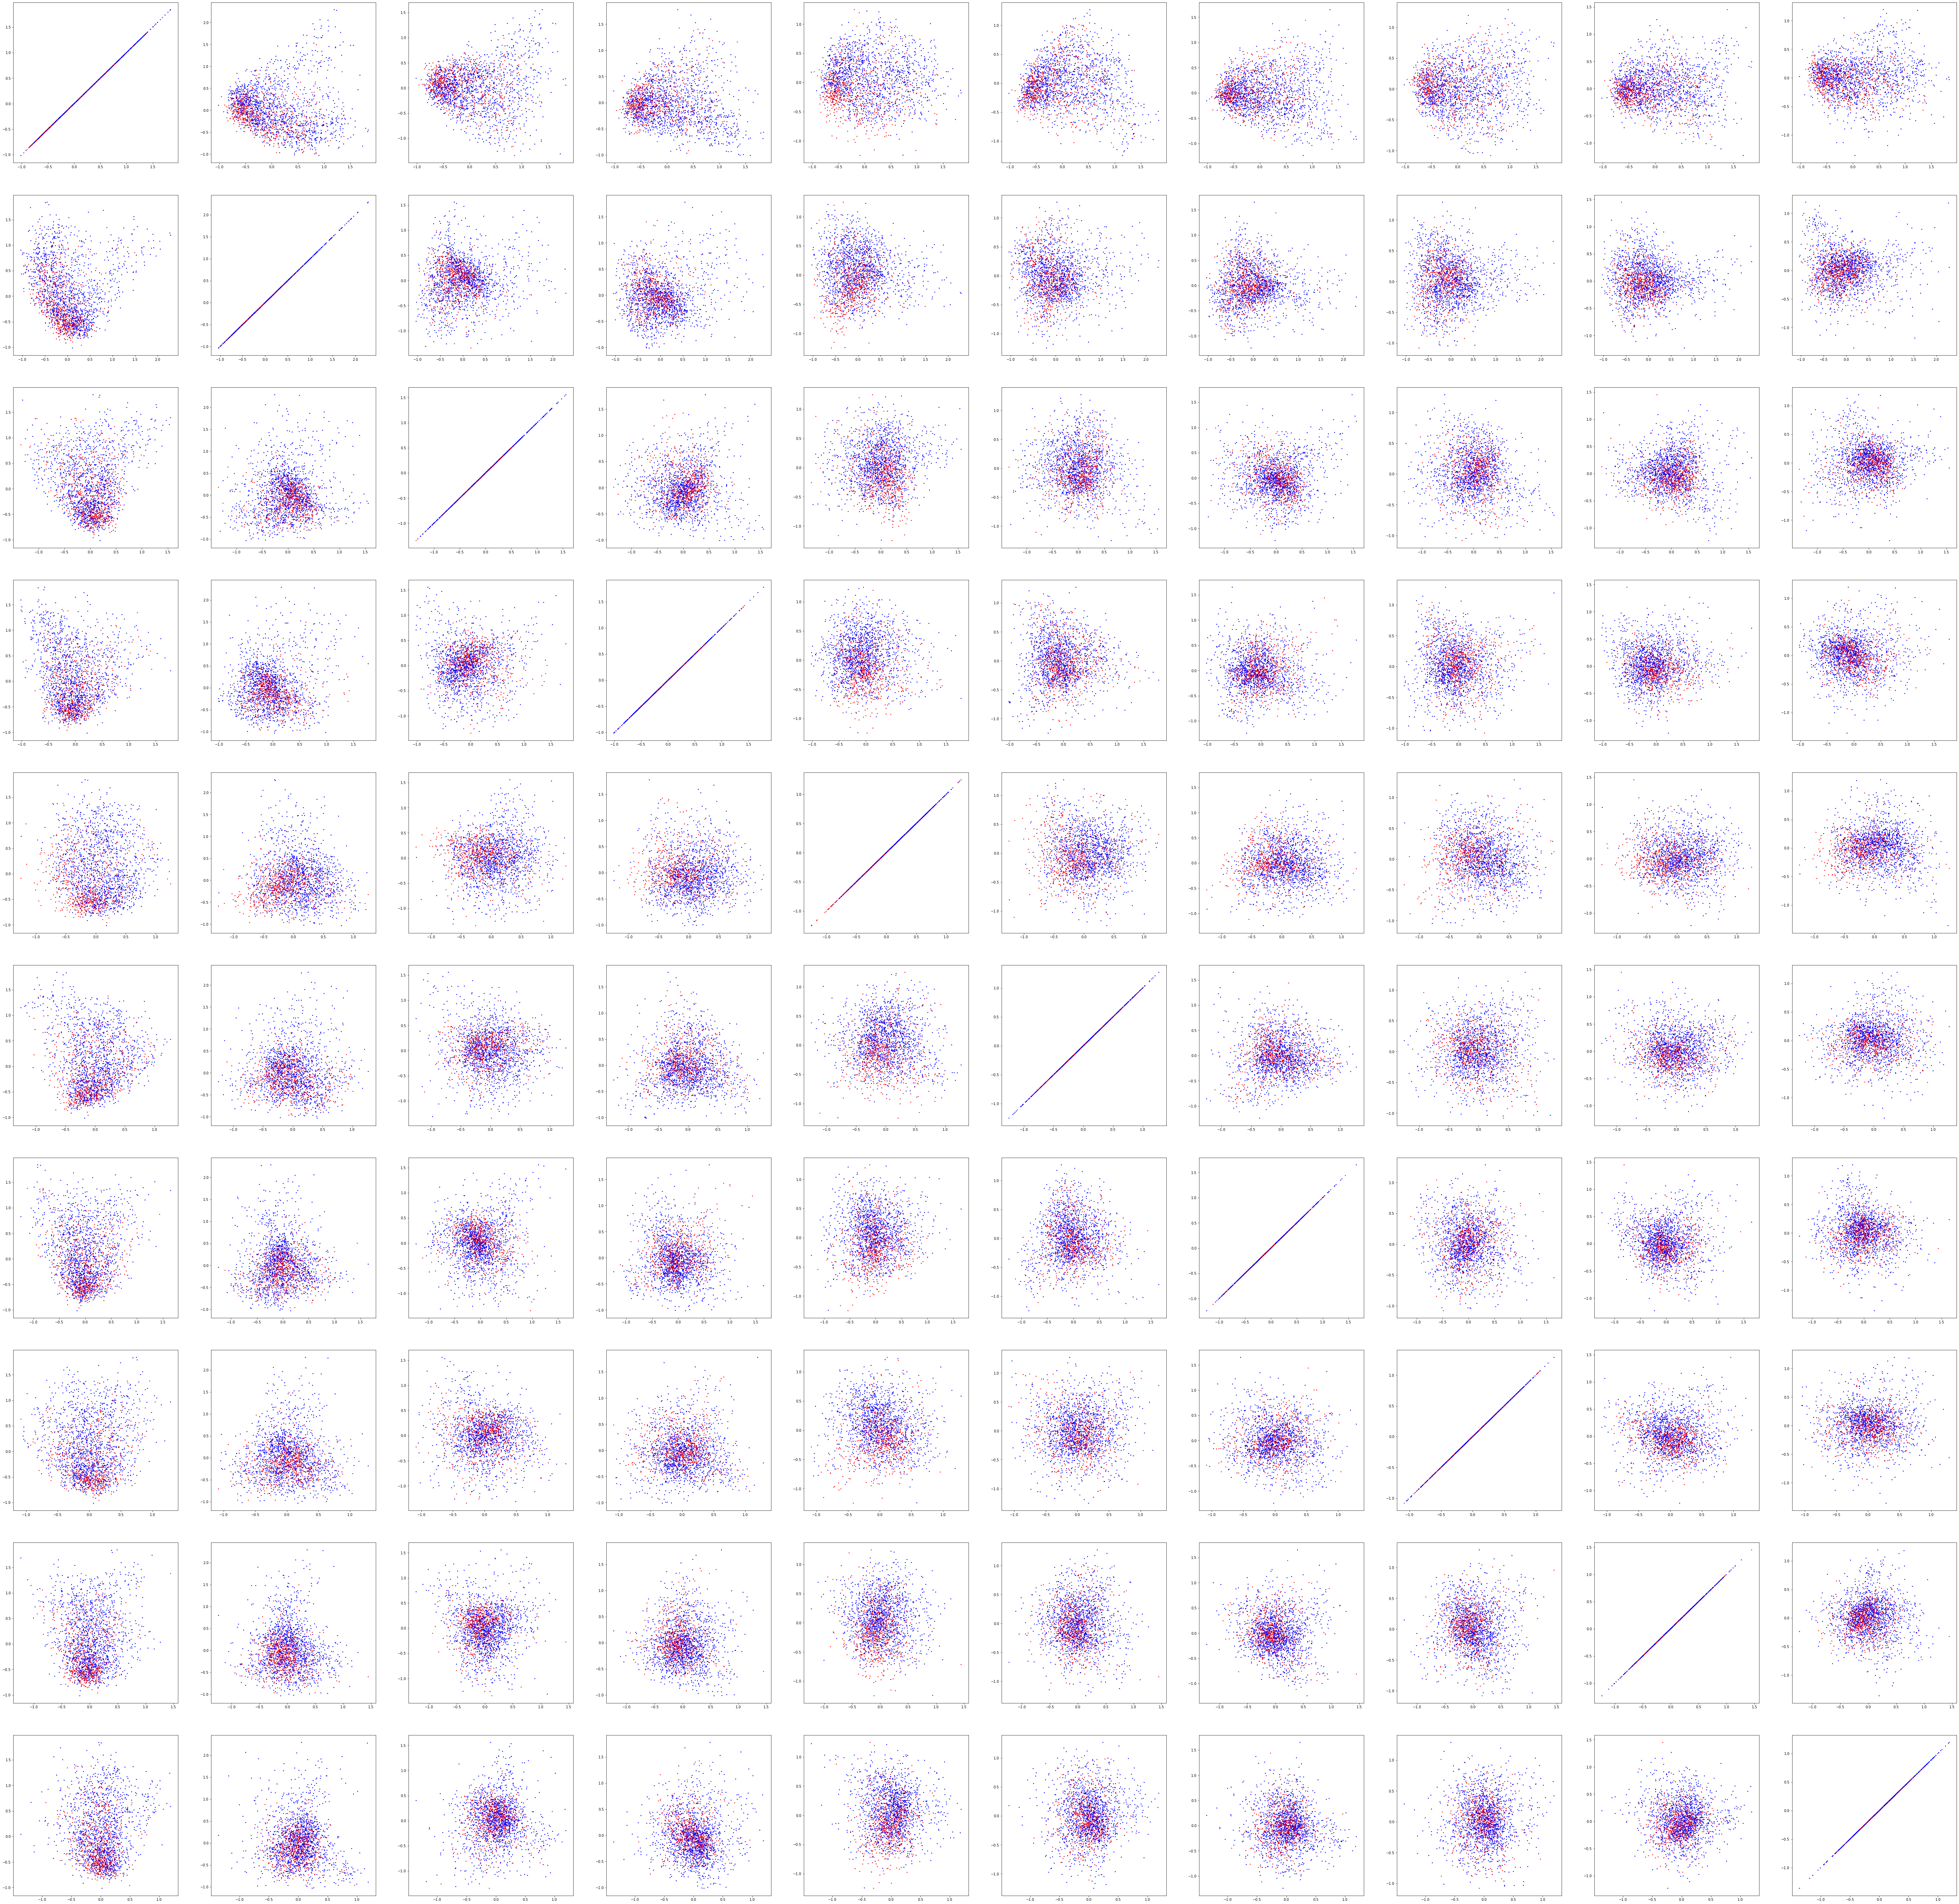

In [118]:
tmp=list(pca_tfidf_sklearn.transform(x))
x1 = pca_tfidf_sklearn.transform(x)
fig, axs = plt.subplots(comp, comp)
fig.set_figheight(100)
fig.set_figwidth(100)
for i in range(comp):
    for j in range(comp):
        col = np.where(np.array([u2.is_intersting(w) for w in orig_words]), 'red', 'blue')
        axs[i, j].scatter(x1[:, i], x1[:, j], alpha=1, s=3, c=col)

# Поиск наилучшей модели

In [147]:
def search(model_class, params):
    '''
    Используем сразу сниженную размерность, поскольку все методы переобучаются на данных
    '''
    comp=5
    sklearn_pca = sklearnPCA(n_components=comp)
    pca_tfidf_sklearn = sklearn_pca.fit(x_t)
    pca_tfidf_sklearn.transform(x)
    model = model_class(**params)
    model.fit(pca_tfidf_sklearn.transform(x_t), y_t[0])
    y['pred_transformed'] = model.predict(pca_tfidf_sklearn.transform(x))
    return f1_score(y[0], y['pred_transformed'])

In [148]:
search(LogisticRegression, {})

0.13793103448275862

In [126]:
outp = ''
for n in [1, 2, 3, 5, 7, 10, 15]:
    for w in ['uniform', 'distance']:
        for l in [5, 15, 30, 50]:
            for alg in ['auto', 'ball_tree', 'kd_tree', 'brute']:
                d = {'n_neighbors': n, 'weights': w, 'algorithm': alg, 'leaf_size': l}
                res = search(KNeighborsClassifier, d)
                outp += f'{d}: f1={res}\n'

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

In [129]:
print(outp)

{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 5}: f1=0.3351831298557159
{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 5}: f1=0.33519553072625696
{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 5}: f1=0.34004474272930646
{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 5}: f1=0.3374028856825749
{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 15}: f1=0.3344407530454042
{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 15}: f1=0.3366778149386845
{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 15}: f1=0.33258928571428575
{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 15}: f1=0.33407572383073497
{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 30}: f1=0.33444816053511706
{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'ball_tre

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [175]:
outp = ''
for p in ['l1', 'l2', 'elasticnet', 'none']:
    for s in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
        if s == 'liblinear' and p == ' none':
            continue
        if p == 'elasticnet' and s != 'saga':
            continue
        if s == 'newton-cg' or s == 'lbfgs' or s == 'sag':
            if p == 'l1' or p == 'elasticnet':
                continue
        for C in [0.01, 0.1, 0.5, 1, 2, 10, 100]:
            for tol in [1e-5, 1e-4, 1e-3, 1e-2]:
                for l1 in [1e-04, 1e-2, 0.5, 0.95, 1]:
                    d = {'penalty': p, 'random_state': 1, 'solver': s, 'C': C, 'tol': tol, 'l1_ratio': l1}
                    res = search(LogisticRegression, d)
                    outp += f'{d}: f1={res}\n'

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/li

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.p

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty 

ValueError: penalty='none' is not supported for the liblinear solver

In [176]:
print(outp)

{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 1e-05, 'l1_ratio': 0.0001}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 1e-05, 'l1_ratio': 0.01}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 1e-05, 'l1_ratio': 0.5}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 1e-05, 'l1_ratio': 0.95}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 1e-05, 'l1_ratio': 1}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 0.0001, 'l1_ratio': 0.0001}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 0.0001, 'l1_ratio': 0.01}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 0.0001, 'l1_ratio': 0.5}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 0.0001, 'l1_ratio': 0.95}: f1=0.

In [153]:
search(RandomForestClassifier, {}) # очень медленно

0.3182481751824817

# полиномиальная регрессия

In [155]:
X = x_t.copy()
Y = y_t.copy()

In [158]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import random

nb_degree = 2
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(X_TRANSF, Y)

Y_NEW = model.predict(X_TRANSF)
rmse = np.sqrt(mean_squared_error(Y,Y_NEW))
r2 = r2_score(Y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  4.026222022490211e-15
R2:  1.0


In [162]:
X = x.copy()
Y = y.copy()[0]

In [164]:
X_TRANSF = polynomial_features.fit_transform(X)
Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(Y,Y_NEW))
r2 = r2_score(Y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  0.4387185894115116
R2:  -0.10349748783596735


Как видно, на обучающей выборке модель дает очень хороший результат, однако на тестовой выборке результат значительно хуже. Это свидетельствует о переобучении модели

In [167]:
# using logistic regression

In [168]:
X = x_t.copy()
Y = y_t.copy()

In [169]:
nb_degree = 2
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(X)

model = LogisticRegression()
model.fit(X_TRANSF, Y)

Y_NEW = model.predict(X_TRANSF)
f1_score(Y[0], Y_NEW)

/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9985344406448461

In [171]:
X = x.copy()
Y = y.copy()

In [172]:
X_TRANSF = polynomial_features.fit_transform(X)
Y_NEW = model.predict(X_TRANSF)
f1_score(Y[0], Y_NEW)

0.45714285714285713

Убеждаемся в этом на примере с логистической регрессией, однако полином 21 степени дает значительный прирост к качеству предсказания. Вероятно это наиболее подходящая модель (тк она еще и очень быстрая)

Попробуем трансформировать базис для других моделей

In [177]:
X = x_t.copy()
Y = y_t.copy()

In [178]:
nb_degree = 2
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(X)

model = KNeighborsClassifier()
model.fit(X_TRANSF, Y)

Y_NEW = model.predict(X_TRANSF)
f1_score(Y[0], Y_NEW)

/home/ilya/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.45070422535211263

In [179]:
X = x.copy()
Y = y.copy()

In [180]:
X_TRANSF = polynomial_features.fit_transform(X)
Y_NEW = model.predict(X_TRANSF)
f1_score(Y[0], Y_NEW)

0.08665511265164644

In [181]:
X = x_t.copy()
Y = y_t.copy()

In [182]:
nb_degree = 2
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(X)

model = RandomForestClassifier()
model.fit(X_TRANSF, Y)

Y_NEW = model.predict(X_TRANSF)
f1_score(Y[0], Y_NEW)

<ipython-input-182-c7f75412c89f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_TRANSF, Y)


1.0

In [183]:
X = x.copy()
Y = y.copy()

In [184]:
X_TRANSF = polynomial_features.fit_transform(X)
Y_NEW = model.predict(X_TRANSF)
f1_score(Y[0], Y_NEW)

0.025210084033613446

Ожидаемо плохой результат

Попробуем одну из лучших конфигураций регрессии использовать совместно с полиномами 2 степени

In [185]:
model_sett = {'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 100, 'tol': 0.0001, 'l1_ratio': 0.01}

In [186]:
X = x_t.copy()
Y = y_t.copy()

In [187]:
nb_degree = 2
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(X)

model = LogisticRegression(**model_sett)
model.fit(X_TRANSF, Y)

Y_NEW = model.predict(X_TRANSF)
f1_score(Y[0], Y_NEW)

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0

In [188]:
X = x.copy()
Y = y.copy()

In [189]:
X_TRANSF = polynomial_features.fit_transform(X)
Y_NEW = model.predict(X_TRANSF)
f1_score(Y[0], Y_NEW)

0.42979242979242976

Результат не очень, попробуем поискать лучшие параметры по сетке

In [208]:
outp = ''
X_t = x_t.copy()
Y_t = y_t.copy()
X = x.copy()
Y = y.copy()
X_TRANSF_t = polynomial_features.fit_transform(X_t)
X_TRANSF = polynomial_features.fit_transform(X)
for p in ['l1', 'l2', 'elasticnet', 'none']:
    for s in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
        if s == 'liblinear' and p == ' none':
            continue
        if p == 'elasticnet' and s != 'saga':
            continue
        if s == 'newton-cg' or s == 'lbfgs' or s == 'sag':
            if p == 'l1' or p == 'elasticnet':
                continue
        for C in [0.01, 0.1, 0.5, 1, 2, 10, 100]:
            for tol in [1e-5, 1e-4, 1e-3, 1e-2]:
                for l1 in [1e-04, 1e-2, 0.5, 0.95, 1]:
                    d = {'penalty': p, 'random_state': 1, 'solver': s, 'C': C, 'tol': tol, 'l1_ratio': l1}
                    model = LogisticRegression(**d)
                    model.fit(X_TRANSF_t, Y_t)
                    res = model.predict(X_TRANSF)
                    outp += f'{d}: f1={f1_score(Y[0], res)}\n'

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ilya/.local/lib/python3.8/site-packages/sklearn

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

KeyboardInterrupt: 

In [209]:
print(outp)

{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 1e-05, 'l1_ratio': 0.0001}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 1e-05, 'l1_ratio': 0.01}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 1e-05, 'l1_ratio': 0.5}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 1e-05, 'l1_ratio': 0.95}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 1e-05, 'l1_ratio': 1}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 0.0001, 'l1_ratio': 0.0001}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 0.0001, 'l1_ratio': 0.01}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 0.0001, 'l1_ratio': 0.5}: f1=0.0
{'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'C': 0.01, 'tol': 0.0001, 'l1_ratio': 0.95}: f1=0.

In [ ]:
# matrix for best model

In [213]:
X_t = x_t.copy()
Y_t = y_t.copy()
X = x.copy()
Y = y.copy()
X_TRANSF_t = polynomial_features.fit_transform(X_t)
X_TRANSF = polynomial_features.fit_transform(X)

In [214]:
conf = {'penalty': 'l2', 'random_state': 1, 'solver': 'newton-cg', 'C': 2, 'tol': 1e-05}

In [215]:
model = LogisticRegression(**d)
model.fit(X_TRANSF_t, Y_t)
res = model.predict(X_TRANSF)

/home/ilya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/home/ilya/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [220]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [222]:
confusion_matrix(Y[0], res)

array([[1486,  108],
       [ 292,  171]])

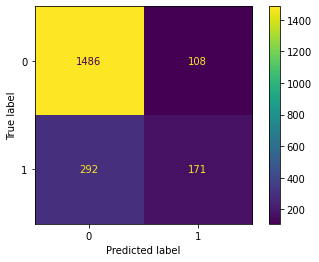

In [224]:
plot_confusion_matrix(model, X_TRANSF, Y[0])